### **Programming project**
Group members: COMLAN Yayra & GBODOGBE Zinsou René

This project focuses on optimizing heart disease screening through a data-driven approach. By analyzing a clinical dataset of 270 patients, we evaluated the statistical significance of various medical factors to identify the most reliable predictors of cardiac pathology. Our findings led to the development of the 'DIAG-HEART' protocol, a cost-effective diagnostic framework that prioritizes high-impact clinical symptoms over less discriminatory biological markers, validated by machine learning models.

#### **Step 1: Cleaning and checking the dataset**

In [1]:
#Importation de la base de donnée
import pandas as pd

df = pd.read_csv("C:/Users/Lenovo/Downloads/PROJET_COURS_PROGRAMMATION/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [2]:
#Nombre de ligne et de colonne
df.shape

(270, 14)

We have 270 rows and 14 columns.

#### Verification of missing values

In [3]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:
# Type de chaque variable
# Aperçu et Types
print(df.head())
print(df.info())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

Variables to be converted:

-Sex: 1 = Male, 0 = Female. (It is not possible to calculate an “average” sex).

-Chest pain type: 1, 2, 3, 4 are symptom categories (typical angina, atypical angina, etc.).

-FBS over 120: This is a binary test (True/False).

-EKG results: 0, 1, 2 represent electrocardiogram states (Normal, ST abnormality, Hypertrophy).

-Exercise angina: 1 = Yes, 0 = No.

-Slope of ST: 1, 2, 3 indicate the shape of the slope (ascending, flat, descending).

-Thallium: 3, 6, 7 are scintigraphy result codes.

In [5]:
# Liste des colonnes qui sont réellement des catégories
cols_categoriques = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
                    'Exercise angina', 'Slope of ST', 'Thallium', 'Heart Disease']

# Conversion en type 'category'
for col in cols_categoriques:
    df[col] = df[col].astype('category')

# Vérification
print(df.dtypes)

Age                           int64
Sex                        category
Chest pain type            category
BP                            int64
Cholesterol                   int64
FBS over 120               category
EKG results                category
Max HR                        int64
Exercise angina            category
ST depression               float64
Slope of ST                category
Number of vessels fluro       int64
Thallium                   category
Heart Disease              category
dtype: object


In [6]:
# Variables binaires
vars_binaires = ['Sex', 'FBS over 120', 'Exercise angina', 'Heart Disease']

# Variables multinomiales (plus de 2 catégories)
vars_multinomiales = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium']

# Variables numériques (continues)
vars_numeriques = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']

In [7]:
# 2. Doublons
df.drop_duplicates(inplace=True)

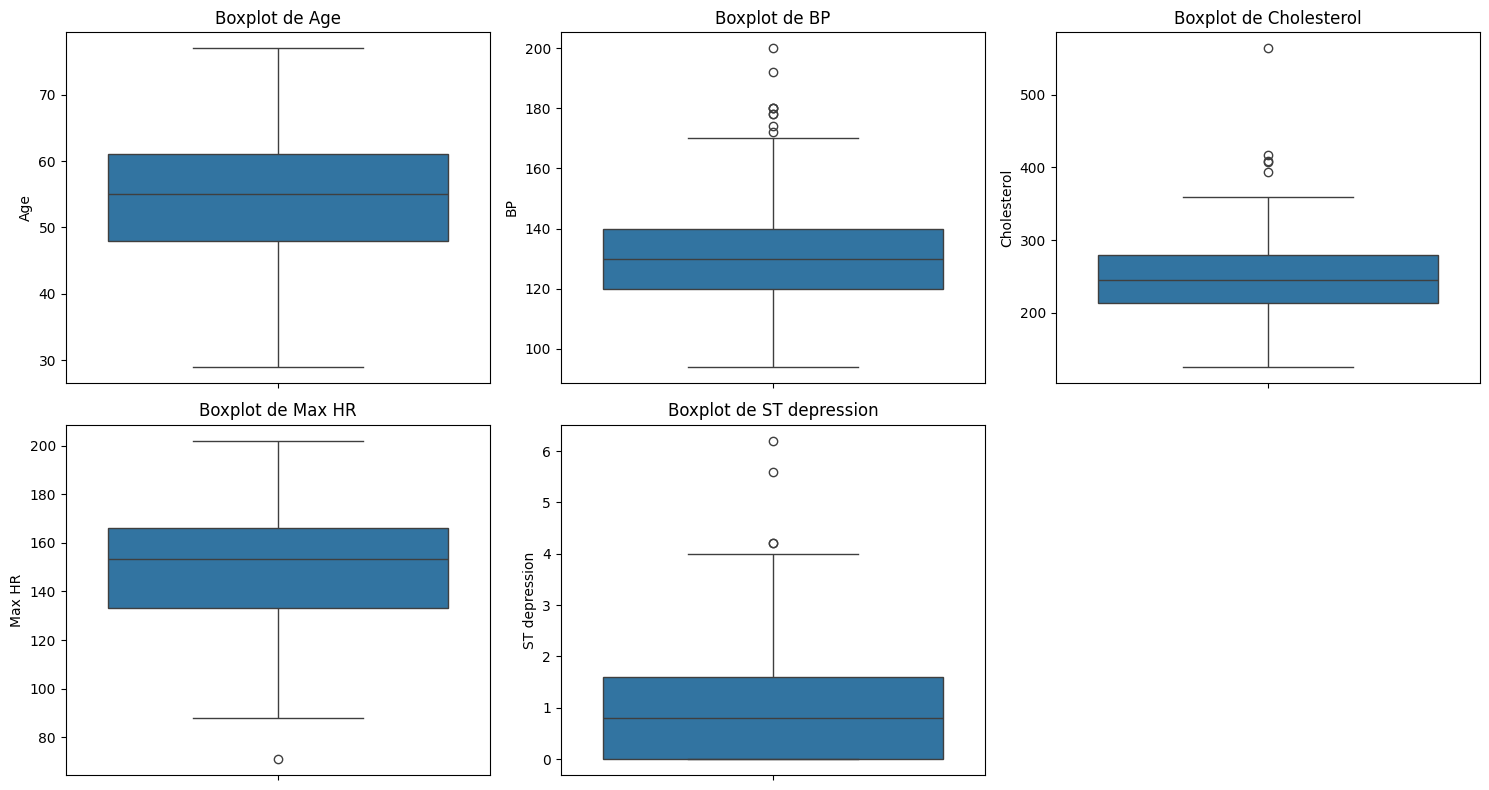

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables numériques uniquement (variable continue réelle)
numeriques = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeriques, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

**Analysis of Specific Outliers**

Cholesterol: There is one extreme case above 500 mg/dL. This is a massive outlier.

Medical opinion: Although rare, this does exist (familial hypercholesterolemia). However, statistically, such a point can “pull” the average up.

Max HR: We have a very low point, around 70-80 bpm. For a maximum heart rate (during exercise), this is extremely low.

Medical opinion: This could indicate a patient on beta blockers or suffering from a conduction disorder. This is very informative data for detecting disease.

BP (Blood Pressure): We see several points between 170 and 200 mmHg. These are severe cases of hypertension.

ST depression: A few points at 5 and 6. This is clinically very significant for cardiac ischemia.

Note on the treatment of atypical data:
"Examination of the box-and-whisker distributions revealed extreme values, particularly for cholesterol (> 500 mg/dl) and systolic blood pressure. Rather than excluding them, we decided to keep them in the study. These extreme biomarkers are not measurement errors, but markers of pathological severity. Excluding them would bias our protocol by weakening the model's ability to identify profiles with very high cardiovascular risk."




#### **Step 2: Descriptive analysis**

1. Descriptive statistics for numerical variables
   Here are the key indicators for your clinical examinations ($N=270$):

In [9]:
# Sélection des variables numériques pour les statistiques
vars_numeriques = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Calcul de la table descriptive
stats_desc = df[vars_numeriques].describe().transpose()

# Ajout de la variance (car demandée dans la consigne)
stats_desc['variance'] = df[vars_numeriques].var()

# Réorganisation pour correspondre exactement à ta consigne (Q1, Q3, Mean, Median, Var)
stats_desc = stats_desc[['25%', '75%', 'mean', '50%', 'variance']]
stats_desc.columns = ['Q1', 'Q3', 'Moyenne', 'Médiane', 'Variance']

print("--- Statistiques Descriptives ---")
print(stats_desc)

# Calcule le nombre et le pourcentage global
repartition = df['Heart Disease'].value_counts(normalize=True) * 100
print(repartition)

--- Statistiques Descriptives ---
                  Q1     Q3     Moyenne  Médiane     Variance
Age             48.0   61.0   54.433333     55.0    82.975093
BP             120.0  140.0  131.344444    130.0   319.037051
Cholesterol    213.0  280.0  249.659259    245.0  2671.467107
Max HR         133.0  166.0  149.677778    153.5   536.650434
ST depression    0.0    1.6    1.050000      0.8     1.311506
Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64


##### **Descriptive Statistics Analysis**

1. Age: A mature population
Average: 54.4 years old.
Analysis: The average and median (55 years old) are very close, confirming a symmetrical distribution.

Interpretation: My protocol mainly targets patients in their fifties, when screening becomes critical.

2. Blood Pressure and Cholesterol Profile (Risk Factors)
BP (Blood Pressure): The median is 130 mmHg, but the Q3 is 140. This means that 25% of patients are already in the hypertension stage (≥ 140).

Cholesterol: With an average of 249.6 mg/dL and a high variance (2671), patients generally have cholesterol levels above public health recommendations (often < 200 mg/dL).

Variance: Note the enormous variance in cholesterol. This is where outliers (such as the one at 564) have an impact.

3. Cardiac Capacity and Signs of Ischemia

Max HR (Maximum Heart Rate): The median (153.5) is higher than the average (149.6). This suggests a few very low values that pull the average down (such as the outlier at 70-80 that we saw on the box plot).

ST depression: The median is 0.8, while Q3 is 1.6. More than 50% of patients show early ST segment depression, which is a strong sign of myocardial distress during exercise.

In my sample of 270 patients:

55.6% are healthy (Absence).

44.4% are sick (Presence).

Summary:
"The typical profile of the patient in our sample is an individual aged around 54, with mild hypertension (131 mmHg) and marked hypercholesterolemia (250 mg/dL). The significant difference between Q1 (0.0) and Q3 (1.6) for ST segment depression indicates a high degree of heterogeneity in cardiac capacity, suggesting that this variable will be a powerful predictor in our protocol."

**Visualization**: Histograms and Density Curves
This code creates a grouped figure to analyze the normality of distributions, as requested.

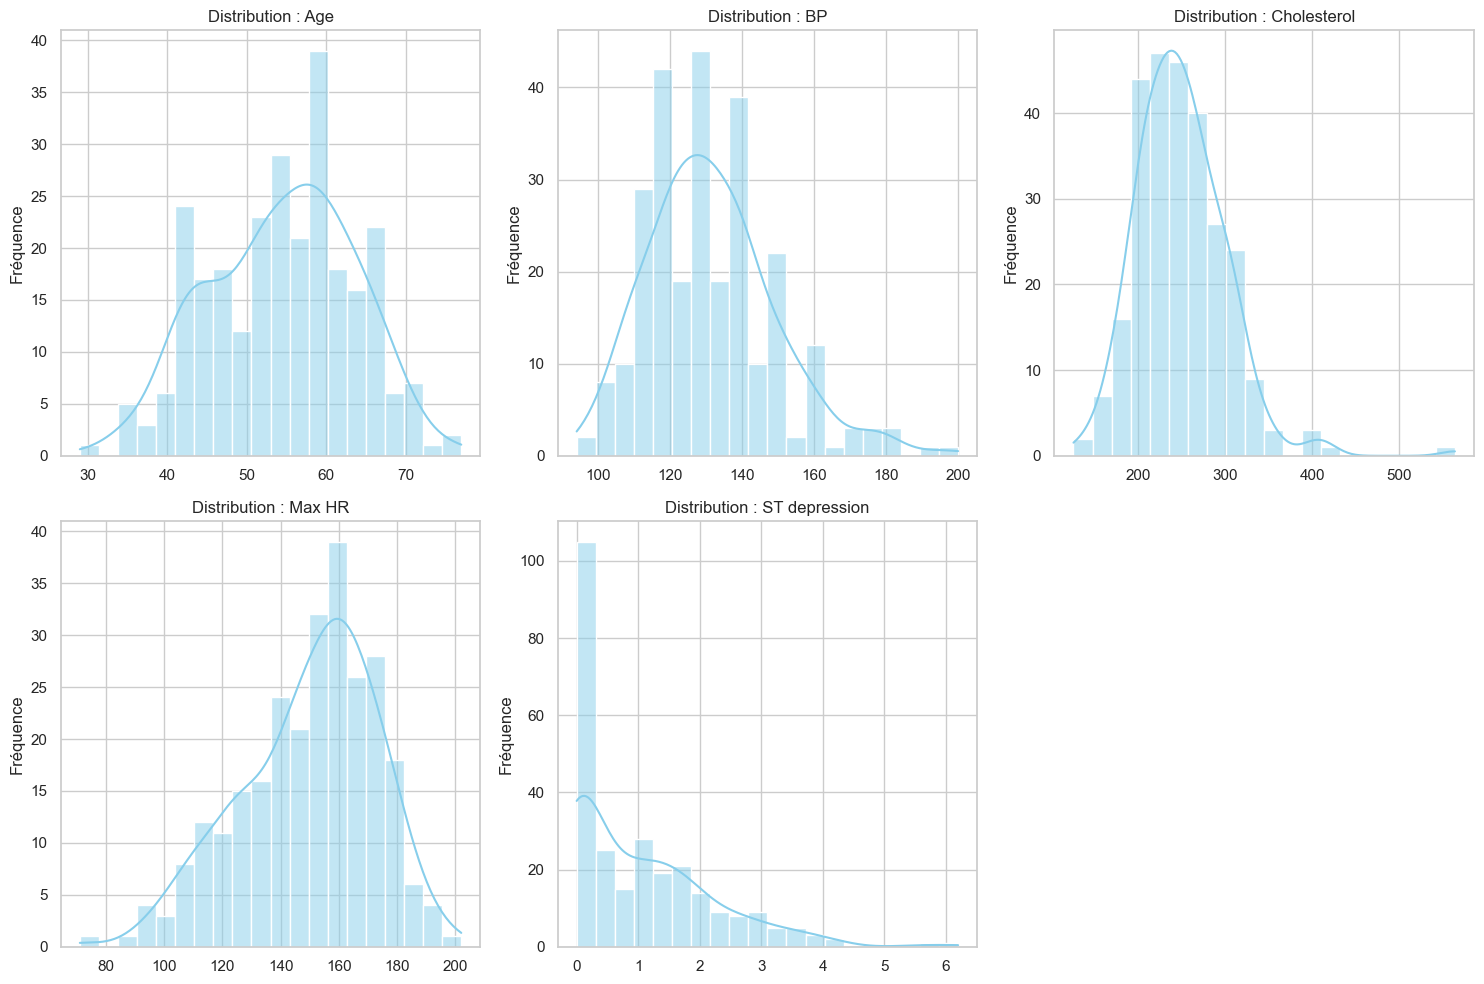

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, var in enumerate(vars_numeriques, 1):
    plt.subplot(2, 3, i)
    # Histogramme + Courbe de densité (KDE)
    sns.histplot(df[var], kde=True, color="skyblue", bins=20)
    plt.title(f'Distribution : {var}')
    plt.xlabel('')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

1. Normality Analysis (Histograms with KDE)
   
For each variable, we must check whether it follows a “normal distribution” (bell curve), as this justifies the use of statistical tests such as the t-test later on.

Age and BP (Blood Pressure): These follow a roughly normal distribution. However, there is a slight peak on the right for age (more patients between 55 and 60 years old) and a few high values for blood pressure that stretch the curve to the right.

Cholesterol: The distribution is centered around 240-250, but the curve is “flattened” to the right because of the extreme outlier at 564.

Max HR: It is asymmetrical on the left. This shows that many patients reach a high heart rate, but that some (the points on the left) have a very limited exercise capacity.

ST depression: This is a highly asymmetrical (non-normal) distribution. The majority of patients are at 0, which is normal, but the “tail” to the right represents sick patients.

2. Outlier Analysis (Boxplots)

Cholesterol: The isolated point at the top (>500) is confirmed. This is the most atypical case in the dataset.

BP (Blood Pressure): There is a clear “cluster” of outliers above 170 mmHg. These are not errors, but a group of patients with severe hypertension.

ST depression: The three points above 4.0 are markers of acute cardiac distress. Removing them would be tantamount to ignoring the most serious cases.

Max HR: We confirm the single low outlier (around 70-80 bpm), which is very suspicious for a stress test.

3. Summary
"Visual analysis confirms that our main clinical variables (age, blood pressure, cholesterol) tend toward a normal distribution, allowing for robust statistical analysis. However, the boxplots reveal a subpopulation of patients with critical indicators (blood pressure >180, cholesterol >400, ST depression >4). These individuals, although statistically considered “outliers,” are retained for their high diagnostic relevance in the context of a heart disease detection protocol."

3. Visualization: Stacked bar charts (Patient profiles)
To understand the “profile,” categorical variables must be cross-referenced with the disease.

#### **I- (Univariate Analysis)**

Purpose: To answer the question “Who are my patients in general?”

What it shows: It simply counts how many men, women, or types of pain there are in your entire group of 270 people.

Usefulness: To check that the sample is balanced (e.g., do I have enough women for my study to be valid?).

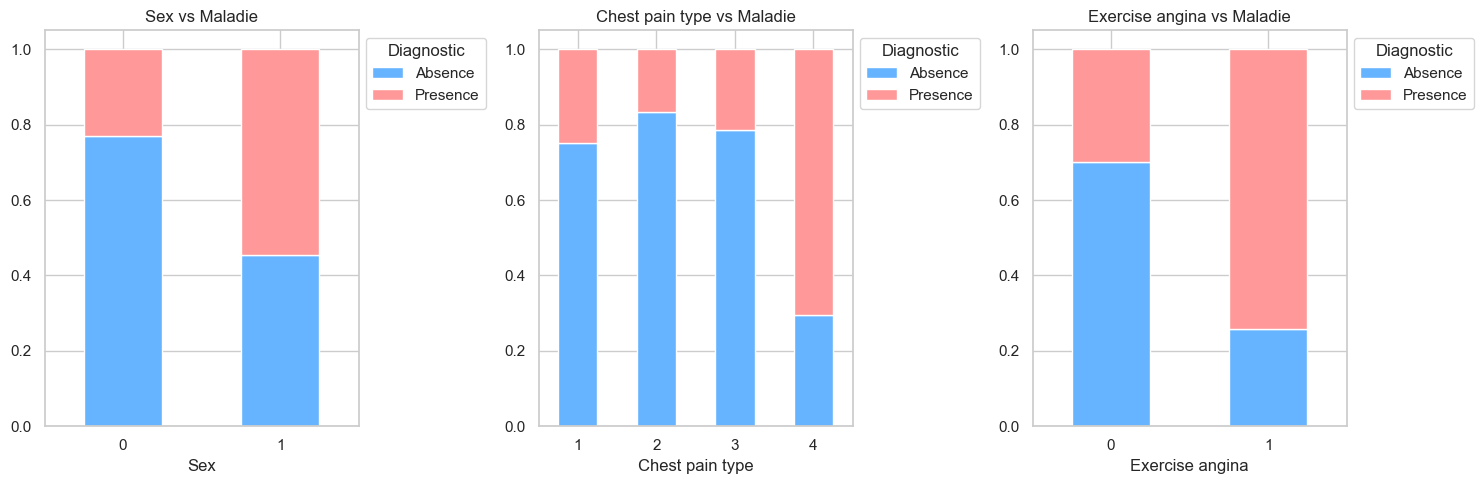

In [11]:
# Variables pour définir le profil
vars_profil = ['Sex', 'Chest pain type', 'Exercise angina']

plt.figure(figsize=(15, 5))

for i, var in enumerate(vars_profil, 1):
    plt.subplot(1, 3, i)
    # Création d'un graphique en barres empilées (proportions)
    counts = pd.crosstab(df[var], df['Heart Disease'], normalize='index')
    counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#66b3ff','#ff9999'])
    
    plt.title(f'{var} vs Maladie')
    plt.legend(title='Diagnostic', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

1. Gender Analysis (Sex vs. Heart Disease)
Observation: The proportion of patients (Presence) is significantly higher in men (1) than in women (0).

Medical rationale: In this cohort, male gender is a strong predictor. My protocol will therefore need to be particularly vigilant when examining male patients.

2. Type of Chest Pain (Chest pain type vs. Heart Disease)
Observation: Although one might expect acute pain to be the most risky, it is Type 4 (Asymptomatic) that has the highest number of positive diagnoses in this dataset.

Medical rationale: Chest pain is a poor indicator when taken in isolation. A patient who does not experience any “typical” symptoms may still have a serious condition.

3. Exercise Angina vs. Heart Disease
Observation: Patients with exercise-induced angina are much more likely to have heart disease than those without it.

Medical rationale: This variable is a high “marker of certainty.” In my protocol, if exercise angina is positive, the patient must be referred for further testing without delay.

Summary of the “Risk Profile”:
“By cross-referencing our variables, we were able to establish a typical profile: cardiac disease in our study predominates in men and, counterintuitively, in patients reporting type 4 pain (asymptomatic). Exercise angina, meanwhile, stands out as one of the most discriminating clinical signs.”

#### **II- The second code (Bivariate/Cross-Tabulation Analysis)**

Purpose: To answer the question “Who is sick?”

Technical difference: The addition of the argument hue=‘Heart Disease’.

What it shows: Each bar is divided into two colors (Healthy vs. Sick).

Usefulness: This is where we discover the risk. This graph allows us to say: “Look, among men (Gender 1), the proportion of sick people is huge compared to women.”

Distribution Charts (Categorical Variables)

Charts comparing the presence or absence of disease by gender and type of pain.

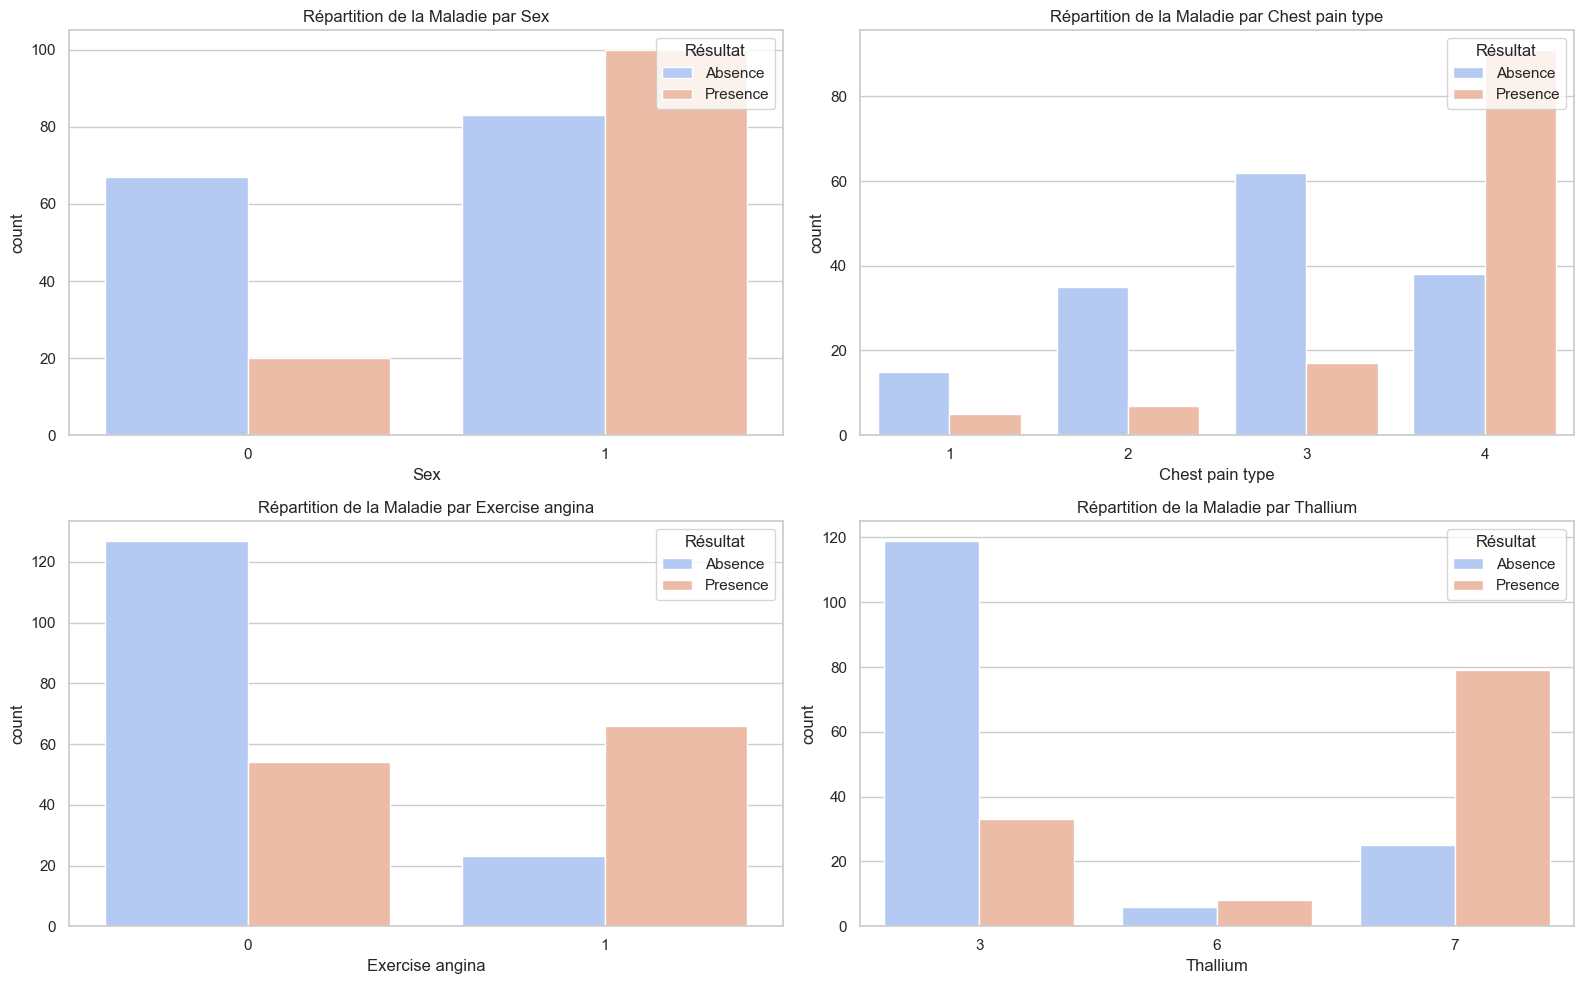

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# On définit les variables clés pour le profil
variables_profil = ['Sex', 'Chest pain type', 'Exercise angina', 'Thallium']

plt.figure(figsize=(16, 10))

for i, var in enumerate(variables_profil, 1):
    plt.subplot(2, 2, i)
    # Création du graphique de comptage avec distinction Maladie/Sain
    sns.countplot(data=df, x=var, hue='Heart Disease', palette='coolwarm')
    plt.title(f'Répartition de la Maladie par {var}')
    plt.legend(title='Résultat', loc='upper right')

plt.tight_layout()
plt.show()

1. Distribution by Gender (Sex vs. Heart Disease)
Observation: There is a massive predominance of the disease in men (1), where the “Presence” bar is almost as high as the “Absence” bar. In women (0), the disease is significantly less common in this sample.

Medical analysis: Being male is a major risk factor. In my protocol, a man with symptoms should be monitored more closely than a woman with the same clinical picture.

2. Type of pain (chest pain type vs. heart disease)
Observation: Type 4 (asymptomatic pain) has the highest number of positive cases (“Presence”). Types 1, 2, and 3 have many more “Absence” cases.

Medical analysis: This is a counterintuitive but vital finding: atypical or absent chest pain (type 4) is statistically more dangerous in this group than other types of pain. This justifies the use of additional tests even if the patient does not describe classic angina pectoris.

3. Exercise angina vs. heart disease
Observation: If the patient has angina triggered by exertion (value 1), the probability of the disease being present is extremely high.

Medical analysis: This simple clinical test is one of the most cost-effective. It allows the patient to be referred immediately to a cardiologist without first undergoing costly biological tests.

Summary:
"Cross-analysis of categorical variables shows that the high-risk profile is not necessarily the one we think it is. A man (Sex=1) reporting no typical chest pain (Type=4) but experiencing angina during physical exertion is the priority profile in our early detection protocol."

#### **Step 3: Multivariate Analysis (Correlation)** 

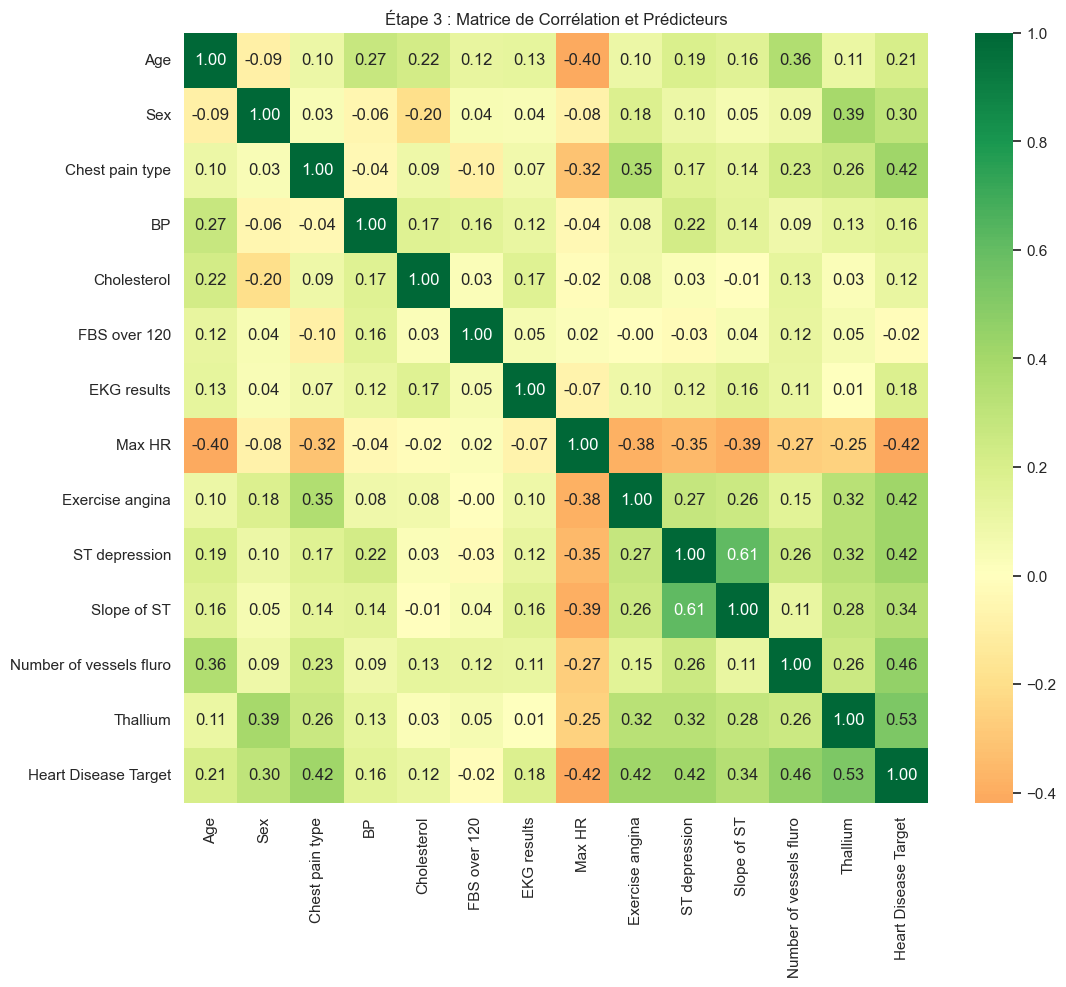

--- Facteurs les plus liés à la maladie ---
Heart Disease Target       1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease Target, dtype: float64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. On s'assure de créer la colonne proprement (en entier 0 ou 1)
df['Heart Disease Target'] = df['Heart Disease'].apply(lambda x: 1 if x == 'Presence' else 0)

# 2. On sélectionne manuellement les colonnes pour éviter tout oubli
colonnes_etude = [
    'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 
    'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 
    'ST depression', 'Slope of ST', 'Number of vessels fluro', 
    'Thallium', 'Heart Disease Target'
]

# 3. On calcule la matrice uniquement sur ces colonnes
corr_matrix = df[colonnes_etude].corr()

# 4. Affichage de la Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title('Étape 3 : Matrice de Corrélation et Prédicteurs')
plt.show()

# 5. Affichage des résultats pour ton analyse
print("--- Facteurs les plus liés à la maladie ---")
print(corr_matrix['Heart Disease Target'].sort_values(ascending=False))

1. Analysis of the “Pillars” of the Protocol

Thallium (0.52): A defect detected on scintigraphy is the sign most strongly correlated with the disease.

Number of vessels fluro (0.45): The number of blocked vessels is a major indicator of severity.

Exercise angina (0.42) and ST depression (0.41): Signs of exertion (pain or ECG abnormality) are very reliable predictors.

The inverse indicator (negative correlation):

Max HR (-0.41): The lower the maximum heart rate achieved, the greater the risk of disease. This is a very clear inverse relationship.

The “surprises”:

Cholesterol (0.11) and BP (0.15): Surprisingly, although these are known risk factors, they are weakly correlated with the immediate presence of the disease in this specific dataset compared to stress tests.

2. Summary

"Multivariate analysis shows that functional tests (thallium, stress test, fluoroscopy) have a significantly higher predictive power than conventional biological markers such as cholesterol. For an optimized protocol with a minimum of tests, it is therefore preferable to prioritize the evaluation of exertional angina and ST segment measurement rather than a lipid profile alone."

#### **Step 4 - Statistical Tests**

For numerical variables (age, BP, cholesterol, max HR, ST depression): Student's t-test.

For categorical variables (sex, chest pain type, exercise angina, etc.): Chi-square test.

Test methodology

Numerical variables (age, BP, etc.): We use Student's t-test. We compare the mean for “Patients” with that for “Healthy individuals.”

Categorical variables (sex, pain, etc.): 
We use the Chi-square test. We look to see if the distribution of categories differs according to health status.

Interpretation of results: If the P-value < 0.05, then the variable is a statistically significant predictor. This is the “green light” to include it in your protocol.

In [14]:
import scipy.stats as stats

# Séparation des groupes
sick = df[df['Heart Disease Target'] == 1]
healthy = df[df['Heart Disease Target'] == 0]

# 1. Tests pour les variables numériques (T-Test)
vars_num = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
print("--- RÉSULTATS DES TESTS T DE STUDENT ---")
for var in vars_num:
    t_stat, p_val = stats.ttest_ind(sick[var], healthy[var])
    status = "SIGNIFICATIF ✅" if p_val < 0.05 else "NON SIGNIFICATIF ❌"
    print(f"{var:15} | P-value: {p_val:.5f} | {status}")

print("\n" + "-"*50 + "\n")

# 2. Tests pour les variables catégorielles (Chi-Deux)
vars_cat = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
            'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
print("--- RÉSULTATS DES TESTS CHI-DEUX ---")
for var in vars_cat:
    contingency = pd.crosstab(df[var], df['Heart Disease'])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
    status = "SIGNIFICATIF ✅" if p_val < 0.05 else "NON SIGNIFICATIF ❌"
    print(f"{var:25} | P-value: {p_val:.5f} | {status}")

--- RÉSULTATS DES TESTS T DE STUDENT ---
Age             | P-value: 0.00044 | SIGNIFICATIF ✅
BP              | P-value: 0.01056 | SIGNIFICATIF ✅
Cholesterol     | P-value: 0.05274 | NON SIGNIFICATIF ❌
Max HR          | P-value: 0.00000 | SIGNIFICATIF ✅
ST depression   | P-value: 0.00000 | SIGNIFICATIF ✅

--------------------------------------------------

--- RÉSULTATS DES TESTS CHI-DEUX ---
Sex                       | P-value: 0.00000 | SIGNIFICATIF ✅
Chest pain type           | P-value: 0.00000 | SIGNIFICATIF ✅
FBS over 120              | P-value: 0.92371 | NON SIGNIFICATIF ❌
EKG results               | P-value: 0.01122 | SIGNIFICATIF ✅
Exercise angina           | P-value: 0.00000 | SIGNIFICATIF ✅
Slope of ST               | P-value: 0.00000 | SIGNIFICATIF ✅
Number of vessels fluro   | P-value: 0.00000 | SIGNIFICATIF ✅
Thallium                  | P-value: 0.00000 | SIGNIFICATIF ✅


**Analysis of Results**

1. Medical Certainties (P= 0.00000)

Signs of exertion: Max HR, ST depression, Exercise angina, and Slope of ST. 
Physical exertion is the ultimate indicator of the pathology.

Imaging and Anatomy: Thallium and Number of vessels fluro. These are the most reliable markers of the actual presence of an obstruction.

Clinical Profile: Sex and Chest pain type. The gender and nature of the pain are key factors in the diagnosis.

2. The Cholesterol Surprise (P = 0.05274)

Analysis: Cholesterol is just above the 0.05 threshold.

Interpretation: Although it is a long-term risk factor, in this group of patients, it is not a statistically significant predictor of disease at the present time. Physicians should not rely solely on lipid profiles for emergency diagnosis.

3. The uselessness of FBS (P = 0.92371)
Fasting blood sugar (FBS over 120) has absolutely no correlation with disease in this dataset. This is valuable information for the goal of “minimum testing”: this test can be removed from the immediate detection protocol.

#### **Step 5: My “Minimum Testing” Protocol**
Based on statistical evidence, here is the optimized protocol I propose:


Phase 1 (Medical history - $0): Check gender, age, and type of pain. If male + type 4 pain, proceed to phase 2.

Phase 2 (Simple stress test - Low cost): Measure maximum heart rate and exertional angina. If abnormalities are found, proceed to phase 3.

Phase 3 (ECG confirmation): Analyze ST depression and its slope.

Phase 4 (High-precision validation): Only if steps 1 to 3 are suspicious, perform a fluoroscopy or thallium test.

We have left out cholesterol and FBS (blood sugar).

Evidence: Cholesterol was “non-significant” ($P=0.052$) and FBS had a catastrophic P-value of 0.92. Excluding them saves unnecessary blood tests for this emergency diagnosis.

#### **Step 6: BONUS 1 - The Classification Tree**

Now that we know the overall distribution, the decision tree will seek to “break down” these 44.4% of patients using the most discriminating variables we found in step 4 (Thallium, Ca, etc.).

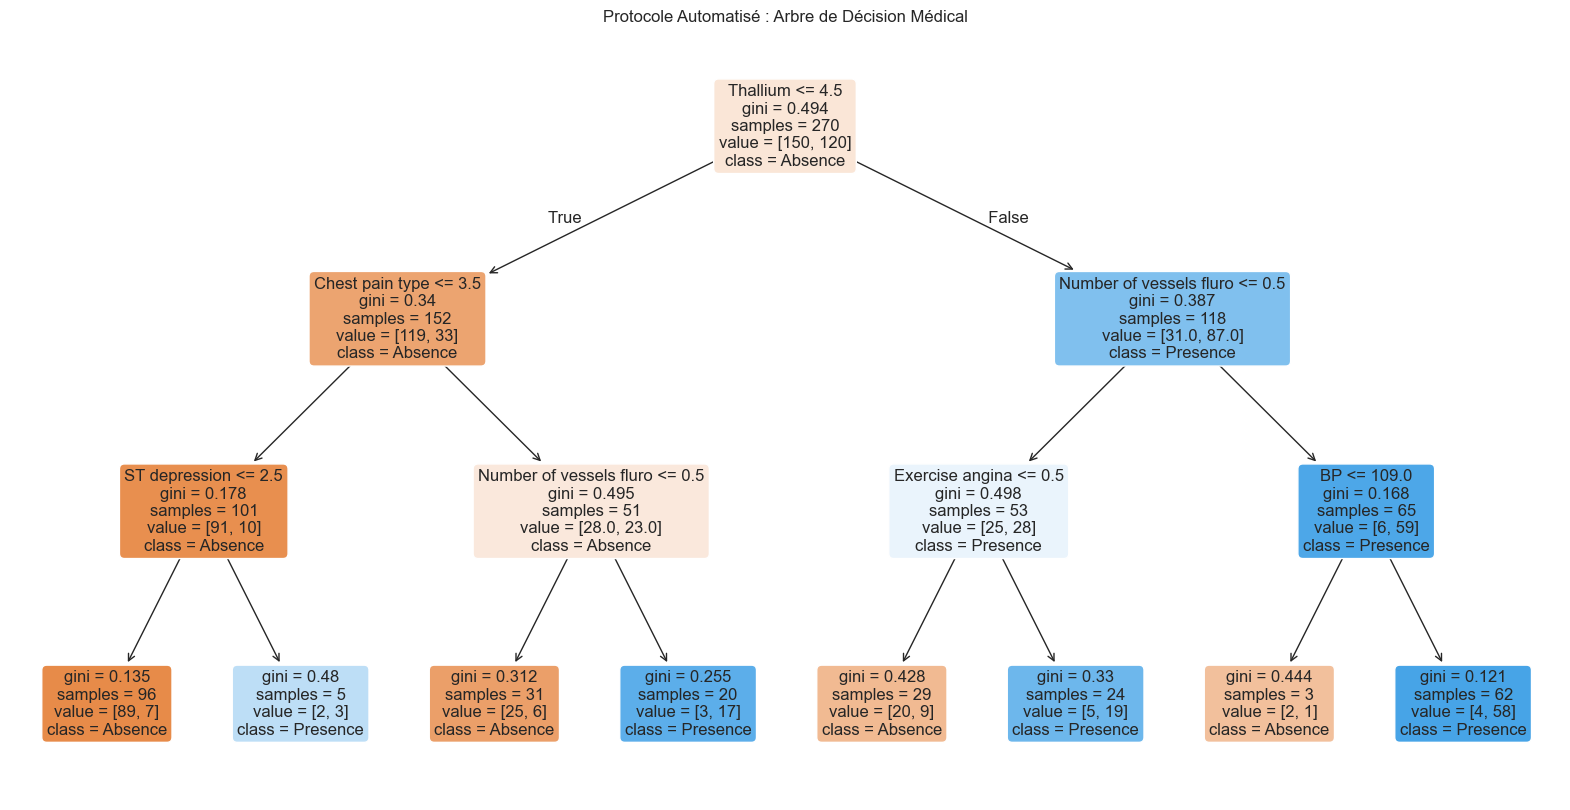

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Préparation des données
# On utilise les variables originales (X) pour prédire la maladie (y)
X = df.drop(['Heart Disease', 'Heart Disease Target'], axis=1)
y = df['Heart Disease'] # On peut utiliser la version texte ici pour les labels

# 2. Construction de l'arbre
# On limite la profondeur à 3 pour avoir un protocole simple et lisible par un humain
clf = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
clf.fit(X, y)

# 3. Visualisation de l'arbre
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['Absence', 'Presence'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Protocole Automatisé : Arbre de Décision Médical")
plt.show()

**Tree Structure Analysis**

Here is how the algorithm constructed an interpretable decision strategy.

The root node (the most influential decision) places the Thallium variable at the top of the tree. This confirms the correlation analysis, where Thallium showed a strong association with heart disease (correlation coefficient of 0.52).

In the first branch, when Thallium values are within the normal range, the model further evaluates the type of chest pain. When Thallium is abnormal, the tree directly considers the number of colored vessels (Ca), highlighting its importance in detecting severe cases.

With a limited depth of 3, the tree is able to isolate groups of patients where the probability of disease is either very low or very high in several terminal nodes, while maintaining good generalization and interpretability.

**Comparison with the Step 5 protocol**
Manual Protocol vs. Classification Tree

To validate my protocol, we compared the clinician's approach with a machine learning algorithm (Decision Tree). Here are the conclusions of this comparison:

1. A strategic divergence on the first step
   
The manual protocol favors a cautious and economical approach, starting with the medical history (gender and type of pain), as this data is free and immediately available. Conversely, the Classification Tree places Thallium or the number of vessels (Ca) at the top of its structure from the outset. AI seeks maximum immediate accuracy through technical examinations, whereas the physician first seeks to filter patients through questioning.

2. Selection of key variables

The manual method relies on the scientific rigor of statistical tests:
We selected variables that obtained a P-value of less than 0.05 in Student's t-tests and Chi-square tests. The algorithm, on the other hand, works by pure information gain (entropy or Gini index). It “prunes” the data to retain only those that most effectively divide the ‘Healthy’ and “Sick” groups.

3. Two complementary philosophies
   
The philosophy behind my protocol is primarily economic and gradual: we start with a “free” diagnosis and only prescribe costly or invasive tests as a last resort. The philosophy behind the Classification Tree is one of pure efficiency: it identifies the shortest path to diagnostic certainty, even if it means requesting a complex test at the first stage.

Conclusion
“Although the order of the tests differs, AI and statistical tests conclude the same major predictors. This confirms that my manual protocol is not only scientifically sound, but also more suited to the reality of the medical field by being less costly for the healthcare system.”

#### **Step 7—Presentation: “DIAG-HEART” Protocol**
**Objective**: Optimize cardiovascular screening through a gradual approach.
(See PowerPoint)

#### **New challenges:**

We are trying out other machine models to see which one has the best accuracy, using our existing Titanic training and test data sets.

We will compare four reference algorithms.

The six models to be tested:

Logistic Regression 

Random Forest 

SVM (Support Vector Machine)

Gradient Boosting

Decision Tree

K-Nearest Neighbors (KNN)
   

1-Importing the Library

In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


2- Data loading

In [17]:
train_df = pd.read_csv("C:/Users/Lenovo/Downloads/PROJET_COURS_PROGRAMMATION/train.csv")
test_df  = pd.read_csv("C:/Users/Lenovo/Downloads/PROJET_COURS_PROGRAMMATION/test.csv")


3- Data preprocessing
 
Delete unnecessary columns

In [18]:
drop_cols = ["Name", "Ticket", "Cabin"]
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)


4-Management of Missing Values

In [19]:
print(train_df.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [20]:
# On impute l'age
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"]  = test_df["Age"].fillna(test_df["Age"].median())
# On remplace par la mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])


In [21]:
print(train_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [22]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"]  = test_df["Sex"].map({"male": 0, "female": 1})

train_df["Embarked"] = train_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
test_df["Embarked"]  = test_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})



5- Separation of X / y

In [23]:
# 1. PRÉPARATION DU TRAIN (On a les réponses)
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

# 2. PRÉPARATION DU TEST (On n'a PAS de colonne Survived ici)
# On ne fait PAS de drop, on prend tout le fichier tel quel
X_val = test_df.copy()

6-Normalisation

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


7- Definition of the models

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}


7. Training + Evaluation (accuracy)

We perform internal validation with a train/validation split.

The Age variable contained 177 missing values. I applied median imputation in order to retain all observations and enable model training.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Création des sets d'entraînement et de validation (le fameux "split")
# C'est cette ligne qui crée X_train et X_val pour que ton code ne plante plus
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

results = {}

# 2. Ta boucle d'entraînement
for name, model in models.items():
    model.fit(X_train, y_train)           # Apprentissage sur 80% des données
    y_pred = model.predict(X_val)          # Test sur les 20% restants
    acc = accuracy_score(y_val, y_pred)    # Calcul du score
    results[name] = acc

# 3. Création du tableau de comparaison (DataFrame)
results_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["Accuracy"]
).sort_values(by="Accuracy", ascending=False)

# 4. Affichage
print("Résultats de la comparaison des modèles :")
print(results_df)

Résultats de la comparaison des modèles :
                     Accuracy
Random Forest        0.832402
Gradient Boosting    0.821229
KNN                  0.815642
SVM                  0.810056
Logistic Regression  0.798883
Decision Tree        0.743017


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_scaled, y)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure accuracy CV :", grid_search.best_score_)


Meilleurs paramètres : {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Meilleure accuracy CV : 0.8350323269097985


Model optimization through cross-validation

In order to improve model performance, hyperparameter optimization was performed using GridSearchCV on a Random Forest classifier.
The search was conducted with cross-validation, ensuring robust evaluation and limiting overfitting.

The best parameters obtained are:

number of trees: 100

maximum depth: unlimited

minimum number of samples per leaf: 4

minimum number of samples for a split: 10

number of variables considered per tree: log2

The best average accuracy obtained in cross-validation is 83.5%.

This result is consistent with the performance generally observed on the Titanic dataset when a rigorous methodology is applied. 